# Logistic Regression with Gradient Descent in PyTorch
___

See the model implementation [here](https://github.com/auhide/ml-basics-pytorch/blob/main/algos/logistic_regression.py).

## 1. Libraries

In [1]:
import os
import sys


# Adding the path to the algorithms modules
ALGOS_PATH = os.path.join("..", "algos")
sys.path.append(ALGOS_PATH)

import torch
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from logistic_regression import LogisticRegression

## 2. Dataset

### 2.1. Generating the dataset

In [2]:
# Creating a mock dataset with sklearn
X, y = make_classification(
    n_samples=150,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_classes=2,
    n_clusters_per_class=2,
    random_state=42
)
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (150, 2)
y shape: (150,)


### 2.2. Visualizing the dataset
As we can see from the plot there are $2$ classes (*red* and *blue*), with some datapoints that are
outliers.

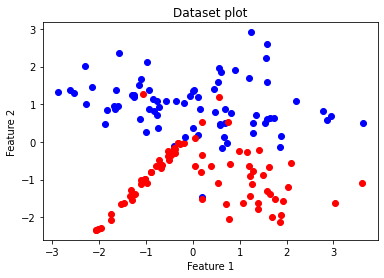

In [3]:
def plot_dataset(X, y, colors={0: "red", 1: "blue"}, title="Dataset"):
    # Plot the two classes
    for i in range(len(y)):
        plt.scatter(X[i, 0], X[i, 1], color=colors[y[i]])

    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()


plot_dataset(X, y, title="Dataset plot")

## 3. Training and evaluation

### 3.1. Training

We will follow the format of the [Linear Regression with PyTorch](https://github.com/auhide/ml-basics-pytorch/blob/main/notebooks/basic/Linear%20Regression.ipynb) notebook.

If we have a feature matrix $X \in \mathbb{R}^{m \times n}$, a target vector $\textbf{y} \in \mathbb{R}^{m \times 1}$ and a weights vector $\textbf{w} \in \mathbb{R}^{n \times 1}$, making a prediction with *Logistic Regression* is defined as:
$$ y_{pred} = \sigma(f(\textbf{w})) = \sigma(X\textbf{w}) $$
where $\sigma(x) = \frac{1}{1 - e^x}$ is the *sigmoid*/*logistic* function. For further information about it you can see its [Wikipedia page](https://en.wikipedia.org/wiki/Sigmoid_function).

Since we are going to do binary classification, the loss function for our model is:
$$ L = \begin{cases} -\ln(y_{pred_i}) && \text{if } y_i = 1 \\ - \ln(1 - y_{pred_i}) && \text{if } y_i = 0 \end{cases} $$

This formula can be summarized into a single line, by using the values of $\textbf{y}$:
$$ L = \frac{1}{m} \sum_{i=0}^{m}{y_i \ln(y_{pred_i}) + (1 - y_i)\ln(1 - y_{pred_i})} $$
it is called the *Log Likelihood Loss*.

In vague terms, we want to maximize the likelihood that our predicted values $\textbf{y}_{pred}$ are closer to the original values $\textbf{y}$.
$$ \max_{\textbf{w}} L $$

But since in *PyTorch* [*autograd*](https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html) is set up to minimize functions, we define our optimization problem as:
$$ \min_{\textbf{w}} -L = \min_{\textbf{w}} - \frac{1}{m} \sum_{i=0}^{m}{y_i \ln(y_{pred_i}) + (1 - y_i)\ln(1 - y_{pred_i})}$$

This new optimization task can be read as minimizing the *Negative Log Likelihood Loss* (*NLLL*), with respect to $\textbf{w}$.
You can see its implementation in the method `_log_likelihood_loss()` of [this file](https://github.com/auhide/ml-basics-pytorch/blob/main/algos/logistic_regression.py).

After we've defined our goal, we can use *Gradient Descent* (*GD*) with which we are going to change our weights vector $\textbf{w}$:
$$ \mathfrak{L} = -L $$

$$ \textbf{w}_{t+1} = \textbf{w}_{t} - \alpha \nabla_{\textbf{w}}\mathfrak{L} $$
where $t$ is the timestep, $\alpha$ is the learning rate, $\nabla_{\textbf{w}}\mathfrak{L}$ is the gradient of the loss function, with respect to $\textbf{w}$.

All this can be seen in the method `fit()` of [this file](https://github.com/auhide/ml-basics-pytorch/blob/main/algos/logistic_regression.py).

In [4]:
X, y = torch.Tensor(X), torch.Tensor(y).unsqueeze(-1)

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, 
    test_size=0.2, random_state=42
)

regressor = LogisticRegression()
regressor.fit(X_train, y_train, l_rate=1e-2, iters=400)

100%|██████████| 400/400 [00:00<00:00, 665.33it/s]

Loss: 0.27


### 3.2. Model evaluation

Validation loss: 0.23


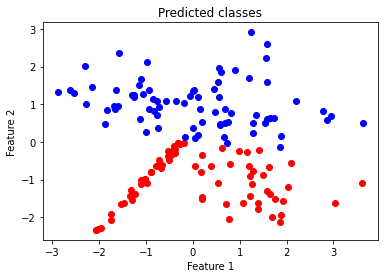

In [5]:
valid_loss = regressor.evaluate(X_valid, y_valid)
print(f"Validation loss: {valid_loss:.2f}")

# Generating a prediction and using it for the coloring of the plot.
y_pred = regressor.predict(X).squeeze(-1).detach().numpy()
plot_dataset(X, y_pred.round(), title="Predicted classes")

As it can be seen if we compare the two plots, the predicted classes are almost
identical to the original ones, except for the outliers.